In [7]:
# -----------------------------------------------------------------------------------------------------------
# LIBRARIES

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import pickle

# hola capullo
# hola capullo2
# -----------------------------------------------------------------------------------------------------------
# DATA

# -----------------------------------------------------------------------------------------------------------
# DATA Setup
data_from_year = '2017'
file_data_stocks_ibex35 = 'C:/Dropbox/jbordas/mIAX/Mod_02c_Backtesting/notebooks/data/stock_data.pkl'       # prices stocks Ibex35
file_data_bechmarks =     'C:/Dropbox/jbordas/mIAX/Mod_02c_Backtesting/notebooks/data/benchmark.pkl'        # prices benchmarks: ibex, ibex_div


# -----------------------------------------------------------------------------------------------------------
# Read pickle
with open(file_data_bechmarks, 'rb') as handle:         # read pickle benchmark
    benchmarks = pickle.load(handle)
benchmark = benchmarks['ibex_div'].close

with open(file_data_stocks_ibex35, 'rb') as handle:     # read pickle stock_data
    stock_data = pickle.load(handle)


# -----------------------------------------------------------------------------------------------------------
# Stock_data filtrado
close_series = {ticker: df.close for ticker, df in stock_data.items()}        # stock_data dictionary to DF
data_close = pd.DataFrame(close_series)
data_close = data_close.loc[data_from_year:]                                  # keep data from
data_close = data_close.dropna(how='all', axis=1)                             # dropna para los activos que no están en este período

open_series = {ticker: df.open  for ticker, df in stock_data.items()}
data_open = pd.DataFrame(open_series)
data_open = data_open.loc[data_from_year:]
data_open = data_open.dropna(how='all', axis=1)


# -----------------------------------------------------------------------------------------------------------
# DFs and Vars Initialization
delta_trades = pd.DataFrame(dtype=float, index=data_close.index, columns=data_close.columns)




In [8]:
# ***********************************************************************************************************
# UNIT TEST -  STRATEGY SIGNALS
# ***********************************************************************************************************



# -----------------------------------------------------------------------------------------------------------
# STRATEGY SETUP   (**** Here the PARAMETERS of the New Strategy ****)

# Fin Setup
init_capital = 100_000

# Parameters
win = 50;       # sma_slow = 200; sma_fast = 1                 # sma_cross parameters


# -----------------------------------------------------------------------------------------------------------
# STRATEGY SIGNALS   (**** Here the Code of the New Strategy ****)

def movaverage_states(vseries, win):
    '''Calculamos los estados de una estrategia SMA: invertido / desinvertido, en función de una serie de precios y una ventana temporal'''
    sma = vseries.rolling(win).mean()
    signal_states = (vseries > sma).astype(float)
    trading_states = signal_states.shift(1)
    trading_states.iloc[0] = 0
    return trading_states

def sma_signals(vseries, win):
    '''En base a los estados, extraemos las señales de compra venta a realizar'''
    states = movaverage_states(vseries, win)
    signals = states.diff().dropna() # Las señales son quellas que marcan compra (pasan de 0 a 1 = 1), o venta (pasa de 1 a 0 = -1) 
    return signals


# STRATEGY FUNCTION CALL
all_signals = sma_signals(data_close, win)


 


In [9]:

# -----------------------------------------------------------------------------------------------------------
# TEST 01:   PRINT all_signals DataFrame

all_signals  

,SAN,BKIA,NTGY,TRE,ACX,FER,ACS,ELE,SAB,AMS,...,IDR,SGRE,MEL,TL5,REE,COL,TEF,CABK,DIA,ALM
2017-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-17,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0
2020-08-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0
2020-08-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-08-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [11]:
# -----------------------------------------------------------------------------------------------------------
# TEST 02:   COUNT SIGNALS + CHECK PRICES ON SIGNAL DAYS

def check_prices(signals, prices):
    trading = signals[signals != 0]            # Filtramos señales efectivas (distintas de cero)
    trade_prices = prices.loc[trading.index]   # Filtramos los precios por las fechas de las señales
    return trade_prices.isna().any()           # Comprobamos si alguno de esos precios, filtrados por las fechas de las señales, tiene NA

# Check Cantidad Signals
signals_check = pd.DataFrame(all_signals[all_signals == 1].sum(axis=0))
signals_check.columns = ['cant_signals']

# Verificamos que todos los activos tienen precio en los días en los que hay señal
checks = {ticker: check_prices(all_signals[ticker], data_close[ticker]) for ticker in data_close.columns}
checks = pd.Series(checks)
signals_check['prices_problem'] = checks


signals_check



,cant_signals,prices_problem
SAN,49.0,False
BKIA,31.0,False
NTGY,30.0,False
TRE,28.0,False
ACX,35.0,False
FER,31.0,False
ACS,28.0,False
ELE,25.0,False
SAB,30.0,False
AMS,20.0,False



-------------------------------------------------------------
Portfolio Performance
-------------------------------------------------------------

Time:   3.6  years
        1327 days 00:00:00
NP:     5905
NP:     5.9 %   
DD:     -16450
DD:     -14.64 %



<AxesSubplot:>

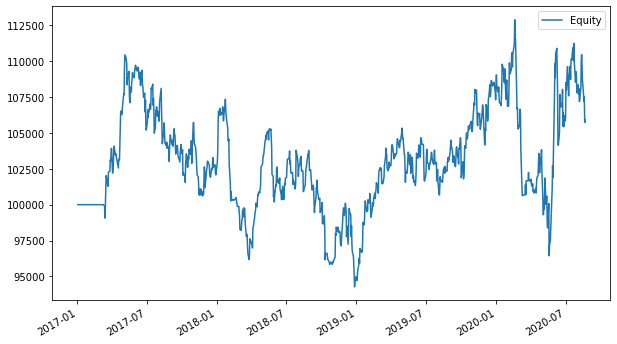

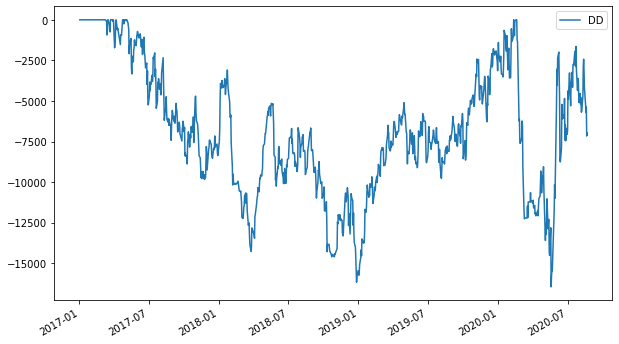

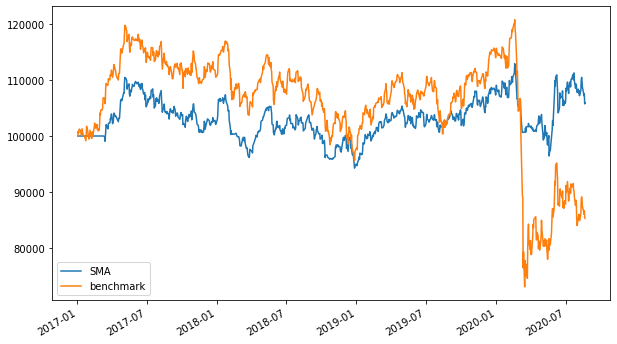

In [12]:
# -----------------------------------------------------------------------------------------------------------
# TEST 03:   BACKTEST

# Inicializar Variables
delta_cash = pd.Series(0, index=data_close.index)                                   # delta_cash = 0
delta_cash.iloc[0] = init_capital                                                   # delta_cash[0] = 100.000
delta_shares = pd.DataFrame(0, index=data_close.index, columns=data_close.columns)  # Iniciamos los registros de acciones a cero

# Bucle Backtest (todas las fechas)
for idate, isignals in all_signals.iterrows():                                      # Recorre todas las filas (fechas) de isignals (idate=index, isignal=vector signals)

    # Revisar compras/ventas en cada fila
    daybuys = isignals[isignals == 1]                                               # Consultamos si hay señales de compra ese día
    daysells = isignals[isignals == -1]                                             # Consultamos si hay señales de venta ese día
    if daybuys.count() == 0 and daysells.count() == 0:                              # Si no hacemos nada ese día, pasamos
        continue

    # Actualizamos el portfolio 
    cash = delta_cash.cumsum()                                                      # it_1: cap inicial,  it_n = actulizado por sumatiria delta_cash
    posiciones = delta_shares.cumsum()                                              # it_1: o,            it_n = actulizado por sumatiria delta_shares
    valoracion = posiciones * data_close                                            # 
    inversiones = valoracion.sum(axis=1)                                            # 
    equity = inversiones + cash                                                     # 
    day_cash = cash.loc[idate]                                                      # Capital disponible que tenemos ese día

    
    # Ejecucion compras y ventas
    in_money, out_money = 0, 0                                                      # Inicializamos los valores de compra y venta

    alloc_limit = equity.loc[idate] * 0.1                                           # Limite MAX por activo: 10% del valor del equity (inversiones + cash)

    # Realizamos las compras
    if daybuys.count() > 0:
        # Estrategia Equiponderada:  Cash_Activo = day_cash/cant activos a comprar (todos los activos igual)
        tk_money = min(day_cash/daybuys.count(), alloc_limit)                       # MIN: (day_cash / Cant Activos a Comprar) y (alloc_limit = 10% Equity)
        
        # Ejecuta la compra
        buy_shares = np.floor(tk_money/data_open.loc[idate, daybuys.index])         # Uso el precio del open para saber cuantas acciones voy a comprar
        out_money = (buy_shares * data_open.loc[idate, daybuys.index]).sum()        # Salida de dinero: nº de acciones que estoy comprando * precio open
        delta_shares.loc[idate, daybuys.index] = buy_shares                         # Apunto en el registro el número de acciones que he comprado para cada activo

    # Realizamos las ventas
    if daysells.count() > 0:
        sell_shares = posiciones.loc[idate, daysells.index]                         # Si la señal marca venta, vendemos la posición entera que tuviera el día anterior
        in_money = (sell_shares * data_open.loc[idate, daysells.index]).sum()       # Entrada de dinero: precio de la acción en open * nº de acciones vendidas
        delta_shares.loc[idate, daysells.index] = -sell_shares                      # Apunto en el registro el número de acciones que he vendido para cada activo

    delta_cash.loc[idate] = in_money - out_money                                    # Apunto en el registro de dinero la diferencia entre: dinero que entra por ventas - dinero que sale por compras

# -----------------------------------------------------------------------------------------------------------
# Actualizacion Ultimo Dia
cash = delta_cash.cumsum()
posiciones = delta_shares.cumsum()
valoracion = posiciones * data_close        # DF,     de cada accion
inversiones = valoracion.sum(axis=1)        # Serie,  del Portfolio Completo
equity = inversiones + cash                 # Serie,  del Portfolio Completo



# -----------------------------------------------------------------------------------------------------------
# PERFORMANCE REPORT

# Net Profit
np_eur = round((equity[-1] - equity[0]))
np_per = round((np_eur / equity[0])*100 , 2)

# DD
dds_eur = (equity - equity.cummax()) - 1; dd_eur = round(dds_eur.min())
dds_per = (equity/equity.cummax()) - 1; dd_per = round(dds_per.min()*100, 2)

# Time
init_date, end_date = equity.index[0], equity.index[-1]
days_in = (end_date - init_date)
years_in = round((end_date - init_date) / pd.Timedelta(days=365, hours=6), 1)   # Los años duran 365 días y 6 horas


print()
print('-------------------------------------------------------------')
print('Portfolio Performance')
print('-------------------------------------------------------------')
print()
print('Time:  ', years_in, ' years')
print('       ', days_in)                                               # *******  Corregir valor, son dias en trade, no dias calendario
print('NP:    ', np_eur)
print('NP:    ', np_per,'%   ')
print('DD:    ', dd_eur)
print('DD:    ', dd_per,'%')
print()


# -----------------------------------------------------------------------------------------------------------
# GRAFICOS PERFORMANCE PORTFOLIO

show_df1 = pd.DataFrame({'Equity': equity})
show_df2 = pd.DataFrame({'DD': dds_eur})
show_df3 = pd.DataFrame({'Invest': inversiones})
show_df4 = pd.DataFrame({'Cash': cash})

show_df1.plot(figsize=(10,6))
show_df2.plot(figsize=(10,6))
#show_df3.plot(figsize=(10,6))
#show_df4.plot(figsize=(10,6))


# -----------------------------------------------------------------------------------------------------------
# PERFORMANCE BENCHMARK

bm = benchmark.reindex(data_close.index)       # Calculamos la rentabilidad del benchmark
bm_equity = init_capital*(bm/bm.iloc[0])       # simulación de inversión del capital inicial en el índice


# -----------------------------------------------------------------------------------------------------------
# GRAFICO Comparacion con Benchmark

# PLOT Comparacion con Benchmark
compare_df = pd.DataFrame({'SMA': equity, 'benchmark': bm_equity})
compare_df.plot(figsize=(10,6))





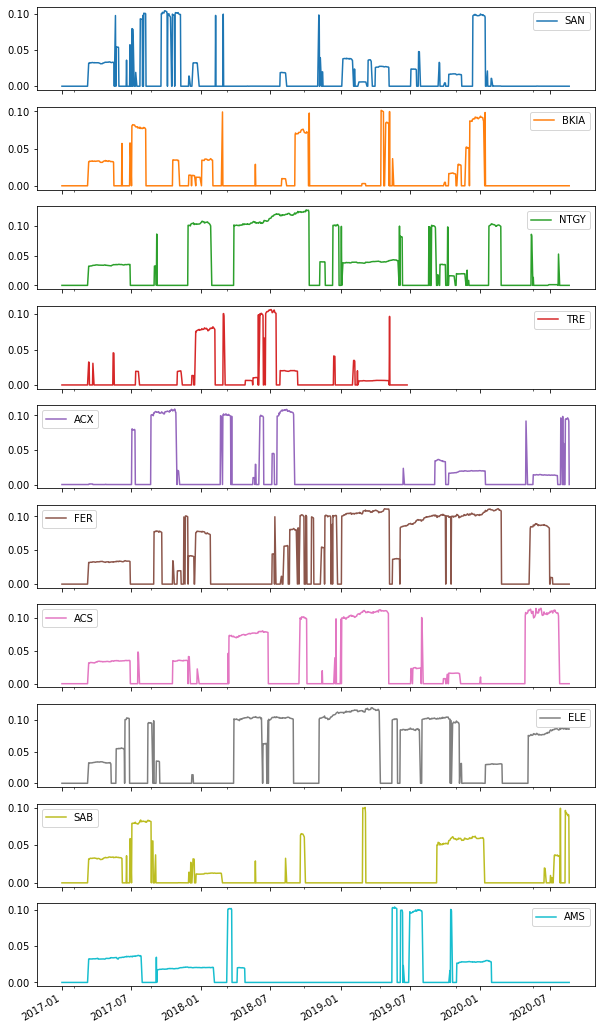

In [13]:
# -----------------------------------------------------------------------------------------------------------
# TEST 04:  GRAFICO Inversion Allocation por Accion (a lo largo del tiempo)

cant_acciones = 10
valoracion1 = valoracion.iloc[:,0:cant_acciones]

allocations = valoracion1.div(equity, axis=0)
figs = allocations.plot(subplots=True, figsize=(10, cant_acciones*2))



,SAN,BKIA,NTGY,TRE,ACX,FER,ACS,ELE,SAB,AMS
2017-05-25,10.077402,0.0,39.201354,0.0,0.0,-20.000479,22.828518,38.096288,-12.104543,32.721572
2017-05-26,-18.139324,0.0,-42.685919,0.0,0.0,56.364986,-56.274951,14.966399,-32.278781,-150.803767
2017-05-29,-3.023221,0.0,27.005377,0.0,0.0,-21.818704,43.533453,-44.899196,0.000000,-96.386370
2017-05-30,-63.487635,0.0,25.263095,0.0,0.0,-23.636930,-60.522117,50.341523,-28.243934,145.468728
2017-05-31,0.000000,0.0,52.268473,0.0,0.0,21.818704,-3.185375,73.471413,34.296205,60.463775
2017-06-01,0.000000,0.0,-30.489943,0.0,0.0,80.001915,6.370749,-35.375125,-10.087119,24.896848
2017-06-02,0.000000,0.0,-10.453695,0.0,0.0,-26.364268,-1.061791,-10.884653,-20.174238,29.876218
2017-06-05,0.000000,0.0,-25.263095,0.0,0.0,-13.636690,18.581352,23.129888,-8.069695,-18.494802
2017-06-06,0.000000,0.0,28.747660,0.0,0.0,-17.273141,-9.556124,77.553158,-16.139391,9.958739
2017-06-07,0.000000,0.0,-20.036248,0.0,0.0,-24.546042,7.963436,-6.802909,-78.679529,12.804093


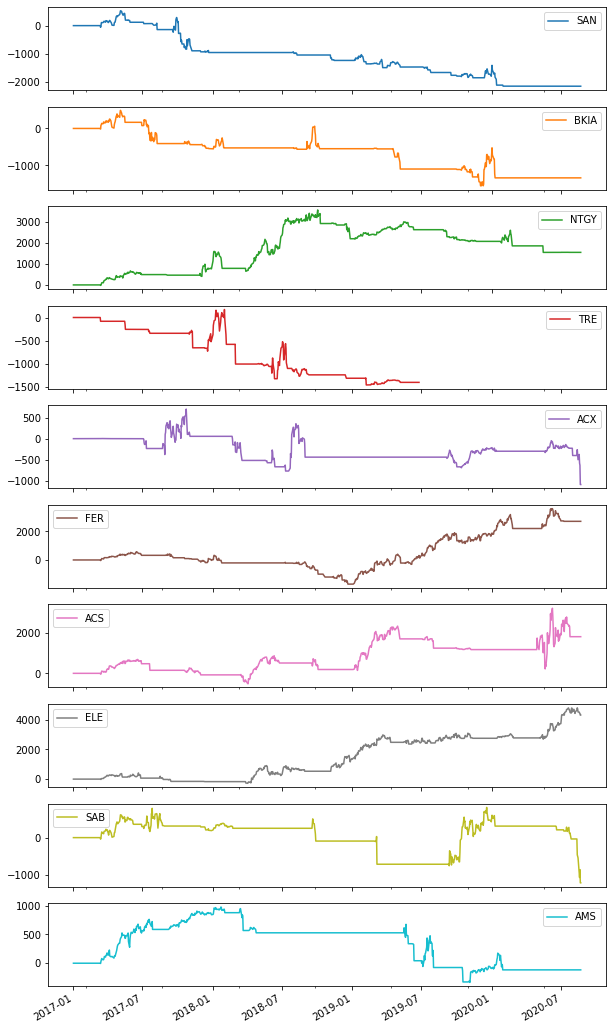

In [14]:
# -----------------------------------------------------------------------------------------------------------
# TEST 05:  GRAFICO EQUITY ACCIONES

cant_acciones = 10

equity_acciones = valoracion.iloc[:, 0:cant_acciones].copy(deep=True)
tkr_cant = equity_acciones.shape[1]
day_cant = equity_acciones.shape[0]
equity_acciones.iloc[0,:] = 0

for tkr in list(range(0, tkr_cant)):
    for day in list(range(1, day_cant)):

        if (valoracion.iloc[day,tkr] != 0 and valoracion.iloc[day-1,tkr] != 0):
            equity_acciones.iloc[day,tkr] = (valoracion.iloc[day,tkr] - valoracion.iloc[day-1,tkr])

        elif (valoracion.iloc[day,tkr] != 0 and valoracion.iloc[day-1,tkr] == 0):
            equity_acciones.iloc[day,tkr] = 0           

        elif valoracion.iloc[day,tkr] == 0:
            equity_acciones.iloc[day,tkr] = 0


# -----------------------------------------------------------------------------------------------------------
# GRAFICO 1
figs = equity_acciones.cumsum().plot(subplots=True, figsize=(10, cant_acciones*2))

# -----------------------------------------------------------------------------------------------------------
# GRAFICO 2
# for i in list(equity_acciones.columns):
#    show_df = pd.DataFrame({i: equity_acciones.loc[:,i].cumsum()})
#    show_df.plot(figsize=(10,2))

rows = 100
equity_acciones.iloc[rows:(rows+20), :]
 